In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Barcelona_dfmguest.csv',
                   encoding='utf8')

In [3]:
df.head(2)

,Unnamed: 0,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,reviews_count,room_id,room_type
0,0,1.0,0.0,1.0,0.128496,3498,41.388655,2.178852,6,2.0,Ciutat Vella,4.0,67.0,75,27,93672,3359293,Entire home/apt
1,1,1.0,1.0,1.0,0.128496,3498,41.387980,2.179656,6,1.0,Ciutat Vella,4.5,135.0,75,4,93672,2477291,Entire home/apt


In [4]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.rename(columns ={'reviews_count':'review_count'},inplace=True)


In [5]:
df.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Barcelona_IP.csv')

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet, LassoCV, Lasso

import patsy

In [7]:
df = df[df.price <= 1000]


In [8]:
df.shape

(13875, 17)

In [9]:
X = df[[x for x in df.columns if x not in ['bhk','price','latitude','longitude','room_id']]]
y = df.price.values
target = np.log(y)


In [10]:
formula = "target ~ "+' + '.join(X)+' -1'
formula

u'target ~ bathrooms + bedrooms + dist_arprt + host_count + metrostn_count + minstay + neighborhood + overall_satisfaction + rest_count + reviews + review_count + room_type -1'

In [11]:
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
y = y.values.ravel()

In [12]:
y

array([ 4.20469262,  4.90527478,  4.61512052, ...,  4.7095302 ,
        4.12713439,  4.8978398 ])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [14]:
X_train.shape, X_test.shape

((9712, 22), (4163, 22))

In [15]:
X_test.head(2)

,neighborhood[Ciutat Vella],neighborhood[Eixample],neighborhood[Gracia],neighborhood[Horta-Guinardo],neighborhood[Les Corts],neighborhood[Nou Barris],neighborhood[Sant Andreu],neighborhood[Sant Marti],neighborhood[Sants-Montjuic],neighborhood[Sarria-Sant Gervasi],...,bathrooms,bedrooms,dist_arprt,host_count,metrostn_count,minstay,overall_satisfaction,rest_count,reviews,review_count
9738,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.147866,460.0,9.0,2.0,5.0,0.0,39.0,5250.0
4818,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.124345,4468.0,16.0,2.0,2.0,25.0,0.0,79490.0


In [16]:
linmod = LinearRegression()

In [17]:
scores = cross_val_score(linmod, X_train, y_train, cv = 10)
print scores
print np.mean(scores)
print np.std(scores)

[ 0.6547336   0.59501662  0.57716759  0.6335648   0.61090499  0.64380529
  0.16092502  0.61785129  0.63120308  0.64520604]
0.577037832348
0.140554776019


In [18]:
predictions = cross_val_predict(linmod, X_test, y_test, cv = 10) 
accuracy = metrics.r2_score(y_test, predictions)
print accuracy


0.619963233285


In [19]:
residuals = y_test - predictions
residuals

array([ 0.40595233, -0.22269683, -0.24653128, ..., -0.03911417,
        0.32599538,  0.60841511])

In [20]:
np.mean(predictions)


4.1858132835236086

In [21]:
linmod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
linmod.score(X_test, y_test)

0.6157118731683886

In [23]:
#linmod.coef_

In [24]:
print np.mean(y_train), np.mean(y_test)

4.20124560572 4.18581004329


In [25]:
# Regularization: Gridsearch an optimal ElasticNet regression

In [26]:
Xn = StandardScaler().fit_transform(X)

In [27]:
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size = 0.3)

In [28]:
# enet_cv = ElasticNetCV(l1_ratio=np.linspace(0.01, 1., 50), n_alphas=300, cv=10, verbose=1)
# enet_cv.fit(Xn_train, y_train)


In [29]:
# print enet_cv.l1_ratio_
# print enet_cv.alpha_

In [30]:
alpha = 0.0176888226782
l1_ratio = 1.0

enet_bc = ElasticNet(alpha= alpha, l1_ratio=l1_ratio)

y_pred_enet = enet_bc.fit(Xn_train, y_train).predict(Xn_test)
r2_score_enet = metrics.r2_score(y_test, y_pred_enet)
print(enet_bc)
print("r^2 on test data : %f" % r2_score_enet)


ElasticNet(alpha=0.0176888226782, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)
r^2 on test data : 0.620073


In [31]:
from sklearn.externals import joblib
joblib.dump(enet_bc, '/Users/jyots/Desktop/DS_Projects/Models/enet_Barcelona.pkl') 

['/Users/jyots/Desktop/DS_Projects/Models/enet_Barcelona.pkl']

In [32]:
lassocv = LassoCV(n_alphas=300, cv=10)

In [33]:
lassocv.fit(Xn_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=300, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [34]:
lassocv.alpha_

0.019931611059770069

In [35]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso_model = lasso.fit(Xn_train, y_train)
y_pred_lasso = lasso_model.predict(Xn_test)
r2_score_lasso = metrics.r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)


Lasso(alpha=0.019931611059770069, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.618193


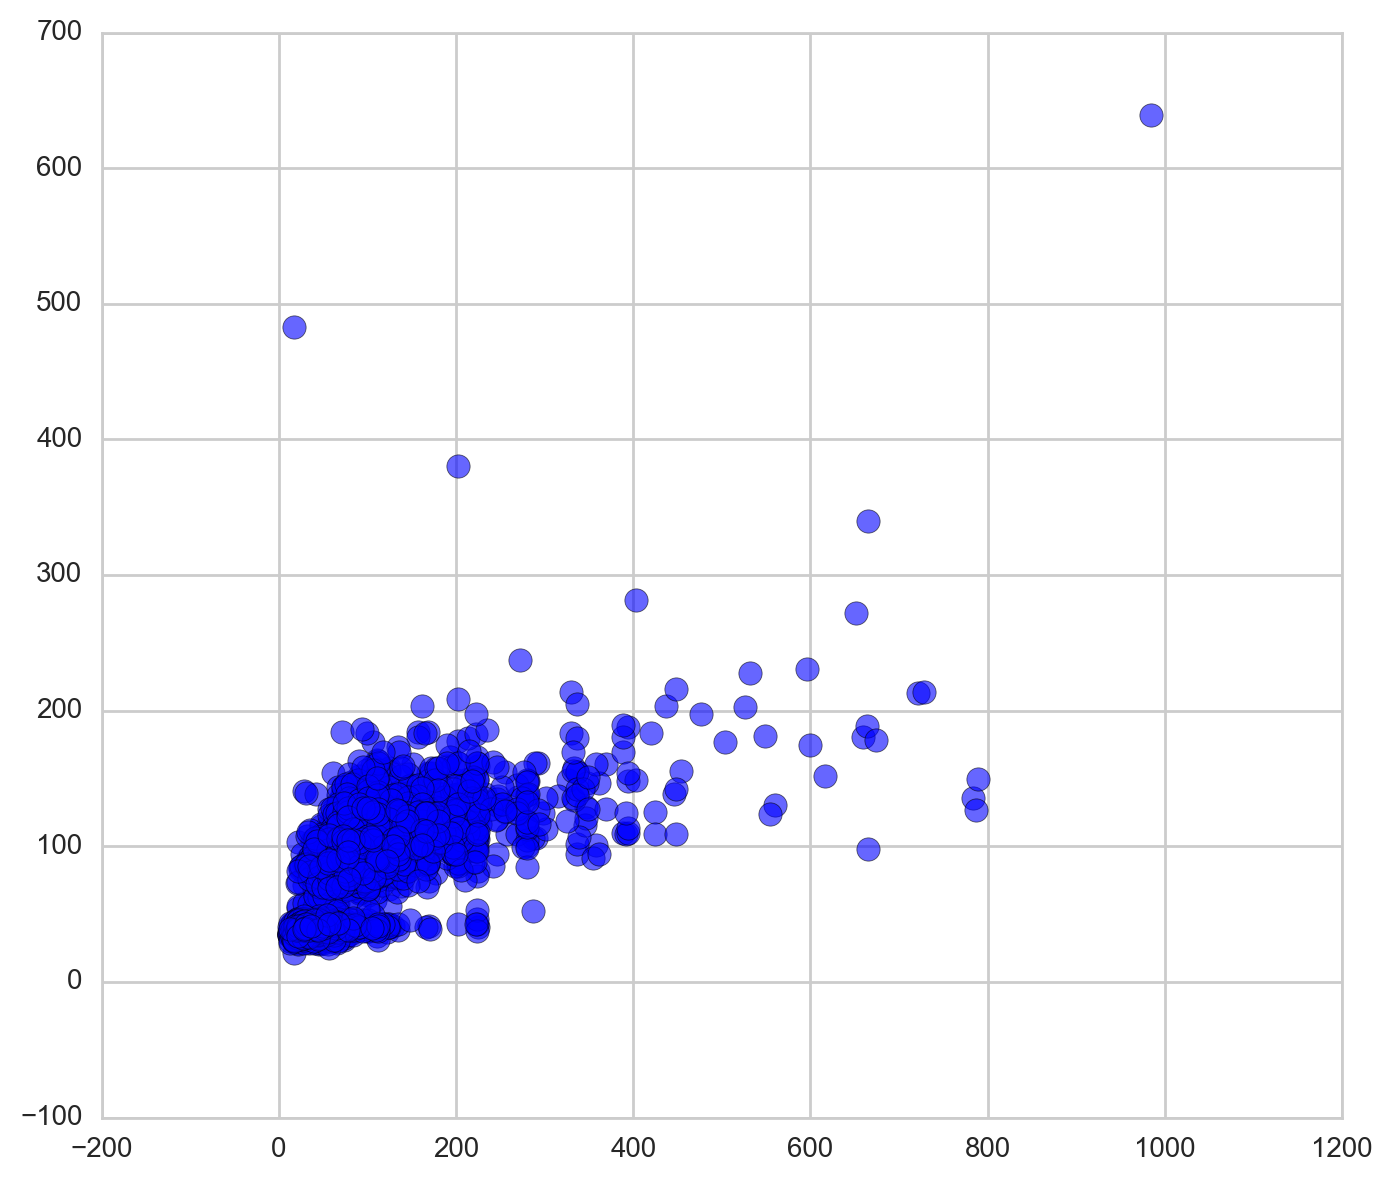

In [36]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(np.exp(y_test), np.exp(y_pred_lasso), s=70, alpha=0.6)
plt.show()

In [37]:
residuals = np.exp(y_test) - np.exp(y_pred_enet)

In [38]:
y_pred_enet_all = enet_bc.fit(Xn_train, y_train).predict(Xn)


In [39]:
residuals_all = np.exp(y) - np.exp(y_pred_enet_all)

In [40]:
len(residuals_all)

13875

In [41]:
df['residuals'] = residuals_all

In [42]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_id,room_type,residuals
0,1.0,0.0,1.0,0.128496,3498,41.388655,2.178852,6,2.0,Ciutat Vella,4.0,67.0,75,27,93672,3359293,Entire home/apt,-6.894470
1,1.0,1.0,1.0,0.128496,3498,41.387980,2.179656,6,1.0,Ciutat Vella,4.5,135.0,75,4,93672,2477291,Entire home/apt,44.758216


In [43]:
df = df[df['residuals']<0]

In [44]:
df = df.reset_index(drop=True)

In [45]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_id,room_type,residuals
0,1.0,0.0,1.0,0.128496,3498,41.388655,2.178852,6,2.0,Ciutat Vella,4.0,67.0,75,27,93672,3359293,Entire home/apt,-6.894470
1,1.0,1.0,1.0,0.128496,3498,41.387722,2.176651,6,2.0,Ciutat Vella,4.0,22.0,75,132,93672,753546,Private room,-8.994909


In [46]:
df.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Barcelona_dfwithres.csv')